# RadioWare Lab 4 - Homodyne Frequency Conversion





## Purpose

The purpose of this lab is to build and measure frequency upconversion and downconversation stages to marry the baseband radio from Lab 2 to the antennas built in Lab 3. This will expose a number of circuit and interference aspects that have to be dealt with in the wireless approach.

## Outline

- Understand the block diagrams and (idealized) mathematical up/down conversion models we are trying to implement.
- Configure the new transmitter: ADALM-2000 baseband output -> Mixer + VCO -> Antenna
- Configure the new receiver: Antenna -> Mixer + VCO -> ADALM-2000 baseband input
- Fine-tune the Vtune voltages of the transmitter and receiver mixers to achieve the desired carrier/LO frequency
- Note that we have effectively transitioned to wireless transmission at this point.
- Observe that the signal received through the wireless link appears weaker than what is received by the wired baseband receiver, and there will be more noise & interference. Noting this in this lab will set the stage for improvements in the next three labs.
- Evaluate the performance of the homodyne radio by looking at the video stream and measuring the bit error rate (BER), frame error rate (FER) and power ratio (received power of "on" signal vs "off" signal in "On-Off Keying").
- Observe and measure the variations of bit error rate, frame error rate and power ratio as the distance between the transmitter and receiver increases.
- Observe the effect of the external interference caused by the electric jammer.

## Background

In Lab 3, by directly driving the antenna with an RF oscillator ("VCO"), we observed that compact antennas work efficiently with high-frequency signals (beyond the IF frequency range that could be generated using the ADALM). In this lab we aim to modulate our data onto an RF carrier by means of a single-mixer up-converter in the homodyne radio. 

### Homodyne

According to Wikipedia, the homodyne was developed in 1932 by a team of British scientists searching for a design to surpass the superheterodyne (two stage conversion model). The design was later renamed the "synchrodyne". Not only did it have superior performance due to the single conversion stage, but it also had reduced circuit complexity and power consumption. The design suffered from the thermal drift of the local oscillator which changed its frequency over time. To counteract this drift, the frequency of the local oscillator was compared with the broadcast input signal by a phase detector. This produced a correction voltage which would vary the local oscillator frequency keeping it in lock with the wanted signal. This type of feedback circuit evolved into what is now known as a phase-locked loop. While the method has existed for several decades, it had been difficult to implement due largely to component tolerances, which must be of small variation for this type of circuit to function successfully.

### VCO 

Voltage controlled oscillators are a type of oscillator where the frequency of the output signal can be varied by adjusting the amplitude of the input tuning voltage. Unlike regular oscillators with a single fixed frequency, these VCOs have a range of frequencies making them desirable with designers. The performance characteristics of these voltage controlled oscillators play a critical role in overall system performance, making them a necessary component in applications such as phase locked loops, frequency synthesizers, electronic jamming equipment and function generators. 

We use minicircuits ZX95-2500A-S+ in our labs. Its datasheet can be found at 
https://www.minicircuits.com/WebStore/dashboard.html?model=ZX95-2500A-S%2B.

### Mixer

A mixer, or frequency mixer, is a nonlinear electrical circuit that creates new frequencies from two signals applied to it. In its most common application, two signals are applied to a mixer, and it produces new signals at the sum and difference of the original frequencies. 

We use minicircuits ZAM-42 in our labs. Its datasheet can be found at
https://www.minicircuits.com/WebStore/dashboard.html?model=ZAM-42

### LO frequency drift

The frequency variations of the local oscillator caused by the thermal drift of the LOs pose a challenge for the coherent demodulation of the signal. However, in this lab, we mitigated the effect of the LO frequency drift on the demodulation process by adopting a non-coherent demodulation scheme. In non-coherent demodulation, the energy of the received signal is measured and compared with a threshold value to determine if a symbol is representing a bit "1" or bit "0". In this scenario, we no longer need to recover the carrier frequency and phase from the drifting effect.

### DC offset

Another important characteristic of homodyne radio, as noted in the Wikipedia page, is that the local-oscillator energy can leak through the mixer stage to the antenna input and then reflect back into the mixer stage. The overall effect is that the local oscillator energy will self-mix and create a DC offset signal. A non-negligible amount of DC offset might affect the demodulation performance of the demodulator, and therefore in the receiver Python program any DC offset of the received waveform is estimated and subtracted out before the non-coherent demodulation.

Sources:

https://en.wikipedia.org/wiki/Direct-conversion_receiver

https://en.wikipedia.org/wiki/Voltage-controlled_oscillator

https://en.wikipedia.org/wiki/Frequency_mixer



## Exercises

### Exercise 4.1: Run the transmitter and receiver programs over the homodyne radio, observe the received video stream and its waveform on the oscilloscope

In this exercise, we are going to construct the homodyne radio and observe the received video streams as well as their waveforms on the oscilloscope.

Refernece the complete block diagram of the homodyne system and the photo of the complete lab setup during construction.
<img src="https://ndwireless.github.io/radioware/lab4_05.jpg" width = 50%>


<img src="https://ndwireless.github.io/radioware/lab4_06.JPG" width=60%>

Our first step is to identify the Vtune voltages required on the transmitter side and receiver side VCOs in order to generate the desired LO frequencies. In our case, we would like the transmitter side LO to be operating at 2.4 GHz and the receiver side LO to be operating at 2.415 GHz. The slight deviation of 15 MHz is introduced to combat the influence of the LO frequency drift on the demodulation performance.

Note: Both the transmitter side and receiver side Vtune voltage needs to be determined and fine-tuned, you could start with either the Tx or Rx VCO.

### When making your connections between modules, ensure that all SMA connectors are fully tightened!

1\. Similar to what we did in Lab 3, connect the isolator (consisting of an amplifier and an attenuator) to the VCO if they are not already connected.

2\. Connect the output of the attenuator with the LO port of the mixer and connect the FieldFox with the RF port output of the mixer. 

3\. Connect the VCO and amplifier to the power supply (plug in the pigtail power cable).

4\. Refer to the VCO calibration tables (found in the lab folder) corresponding to your station's transmitter and receiver VCOs, find the Vtune_tx and Vtune_rx voltages such that the transmitter VCO will produce a 2.4 GHz LO and the receiver VCO will produce a 2.415 GHz LO.

5\. After obtaining the initial Vtune_tx and Vtune_rx voltage values, we are going to fine-tune the voltages by measuring the generated frequencies using the FieldFox (the Vtune generation and FieldFox data capturing scripts we use here will be the same scripts used previously in Lab 3). After generating the Vtune for the VCO and running the FieldFox script,  the output 'The peak power is at frequency ...' will show you what your LO frequency is. Repeat the steps until we reach the desired LO frequency.

Note: Make sure only one ADALM is connected to the PC at a time during the fine-tuning process. (e.g., after obtaining the fine-tuned Vtune voltage for the transmitter ADALM, write down the TX VCO Vtune value you obtained, disconnect TX ADALM from the PC and then fine-tune the receiver Vtune following the same procedure)

#### ADALM2000 as an adjustable power supply (serving as VCO Vtune)

In [ ]:
#sample code to set dc voltage when ADALM2000 works as an adjustable power supply
import libm2k


vtune = 3.50 #change this value to generate the desired frequency


uri = libm2k.getAllContexts()
if(len(uri) == 0):
    libm2k.contextCloseAll()
#open and calibrate ADALM2000
ctx=libm2k.m2kOpen()
ctx.calibrateDAC()
ps = ctx.getPowerSupply()
ps.enableChannel(0, True)

#Use ADALM2000 to generate VCO Vtune
ps.pushChannel(0, vtune)

print("Vtune set at: ", vtune)

Vtune set at:  3.5


#### Reading data from FieldFox and print on local machine
Run the FieldFox data capturing program below to measure the signal power. It is a similar program as in Lab 1 except that the settings have been changed to: center frequency ($2400$ MHz), bandwidth ($40$ MHz), resolution bandwidth ($100$ KHz), number of average traces ($1$), y reference ($10$ dBm). 

The peak power is -24.2397938 dBm
The peak power is at frequency 2418.75 MHz


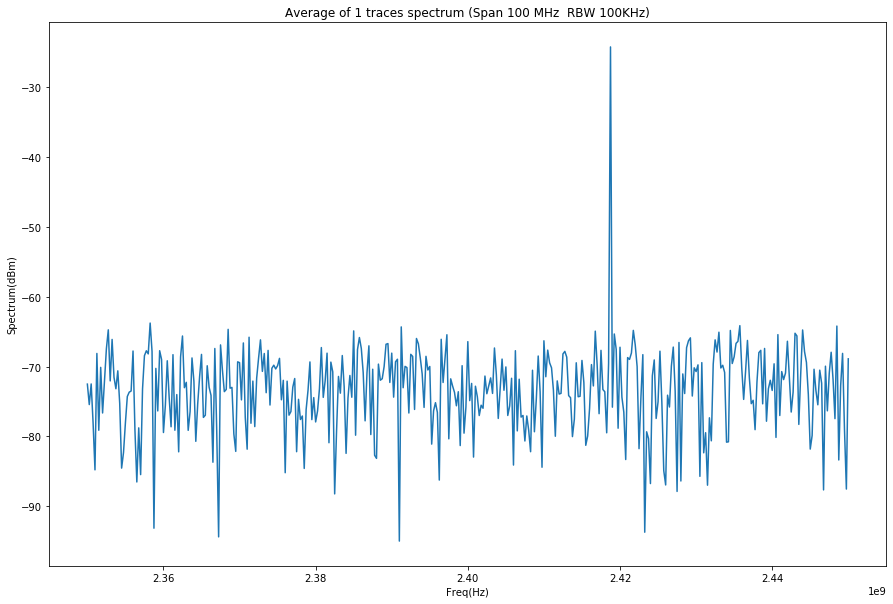

In [ ]:
# sample code which works for Keysight FieldFox N9914B
import visa
import sys
import numpy as np
import matplotlib.pyplot as plt
import time

rm = visa.ResourceManager('C:\\Windows\\System32\\visa64.dll')
try:
    VISA_ADDRESS = "USB0::0x2A8D::0x5C18::MY59221100::0::INSTR"  # set the resource string for your instrument
    inst = rm.open_resource(VISA_ADDRESS)  # open the connection
except visa.Error as ex:
    print('Couldn\'t connect to \'%s\', exiting now...' % VISA_ADDRESS)
    sys.exit()
inst.InputBufferSize = 1000000 # set the buffer size
inst.ByteOrder = 'littleEndian' # set the Byte order
inst.timeout = 10000 # set the timeout value

# Now control the instrument using SCPI commands.
# Refer to the instrument programming manual for your instrument for the correct SCPI commands for your instrument.

span = 40 #MHz, bandwidth
bdw = 100 #KHz, resolution bandwidth
currRFFreq = 2400 #MHz, center frequency
y_ref = 10 #dBm, y reference
ave_number = 1 #number of average traces

inst.write('SYST:PRES;*OPC?')#preset the instrument and wait for operation complete via the *OPC?
a = inst.read()
inst.write("INST:SEL 'SA';*OPC?")
a = inst.read()
inst.write('FREQ:SPAN ' + str(span) + ' MHz')#Set Span
inst.write('BAND ' + str(bdw) + ' KHz') #Set RES BW
inst.write('FREQ:CENT ' + str(currRFFreq) + ' MHz') #Set Center Frequency
time.sleep(1)
inst.write('DISPlay:WINDow:TRACe:Y:RLEVel ' + str(y_ref))#set y axis reference level
inst.write('SENS:SWE:POIN?')#query number of points in trace
numPoints = int(inst.read())
inst.write('SENS:FREQ:START?')#query start frequency
startFreq = float(inst.read())
inst.write('SENS:FREQ:STOP?')#query stop frequency
stopFreq = float(inst.read())
x = np.linspace(startFreq, stopFreq, numPoints)
data_array = np.zeros((1, numPoints))

inst.write('TRAC1:TYPE AVG')
inst.write('SENSe:AVERage:TYPE AUTO')#set average mode
inst.write('SENSe:AVERage:COUNt ' + str(ave_number))#set average count

inst.write('INIT:CONT OFF;*OPC?')#set trigger mode to hold for trigger synchronization
a = inst.read()
inst.write('INIT:IMM;*OPC?')#assert a single trigger and wait for trigger complete
a = inst.read()
inst.write('INIT:REST;*OPC?')
a = inst.read()

inst.write('TRAC1:DATA?')#query the response data
data = inst.read()
data_array = np.array(data.split(',')).astype('float64')#use split to turn long string to an array of values
print('The peak power is ' + str(max(data_array)) + ' dBm')
rxpeakfreq = x[np.argmax(data_array)]
print('The peak power is at frequency ' + str(rxpeakfreq/1e06) + ' MHz')

inst.write('INIT:CONT ON;*OPC?')
a = inst.read()
# Close the VISA connection
inst.close()
rm.close()
# Plot the spectrum
plt.figure(figsize=(15, 10))
plt.xlabel('Freq(Hz)')
plt.ylabel('Spectrum(dBm)')
plt.title('Average of '+ str(ave_number)+' traces spectrum (Span ' + str(span) + ' MHz ' + ' RBW ' + str(bdw) + 'KHz)')
plt.plot(x, data_array)
plt.savefig('fieldfox.png')
plt.show()

Once the fine-tuned Vtune voltages for the transmitter VCO and receiver VCO are obtained, complete the rest of the connections and wirings by following the instructions below:

#### Transmitter side:
1. Transmitter ADALM and the interface board should be attached together.
2. "W1" (internally connected to the analog output of the ADALM) of the interface board should be connected to the "IF" port of the mixer on the transmitter side via an SMA cable.
3. The VCO on the interface board should have its "RF OUT" connected with the input of the amplifier.
4. The output of the amplifier should be connected to the 10 dB attenuator and then connected to the "LO" port of the transmitter side mixer.
5. The transmitter antenna should be connected to the "RF" port of the mixer.

#### Receiver side:
1. Receiver ADALM and the interface board should be attached together.
2. "1" (internally connected to the analog input of the ADALM) of the interface board should be connected to the "IF" port of the mixer on the receiver side via an SMA cable.
3. The VCO on the interface board should have its "RF OUT" connected with the input of the amplifier.
4. The output of the amplifier should be connected to the 10 dB attenuator and then connected to the "LO" port of the receiver side mixer.
5. The receiver antenna should be connected to the "RF" port of the mixer.

#### After making the connections stated above:

1. Connect the power supply cable to the VCOs and amplifiers on the transmitter and receiver sides but don't insert the plug into the outlet.
2. Connect the transmitter ADALM USB cable to the computer, and then connect the receiver ADALM USB cable to the computer.

Note: To observe the received waveform on the oscilloscope, connect the oscilloscope probe positive to the 1+ test point and the oscilloscope probe ground with 1- test point on the interface board.

Note: We provide two ground planes for each station. You can put modules on it as the setup photo did. 

#### Please include the following in your lab report
* A photo of your completely assembled homodyne radio

#### Procedures:

1\. The programs we will be using for this lab, OOK_transmitter_rf.py and OOK_receiver_rf.py, can be found in the zip folder you downloaded.

2\. Verify that your transmitter and receiver ADALMs have been connected properly to the PC. Again, since we are running both programs on the same computer, make sure the transmitter ADALM is plugged in and recognized by the computer before the receiver ADALM.

3\. Verify that your transmitter and receiver ADALMs have been connected properly to the VCOs and IF input/outputs of the mixers. 

4\. Turn on the power supplies for the VCOs and Amplifiers after verifying the wiring. 

5\. Set the distance between the transmitter and receiver antennas to be around 4 cm (you could use the ruler provided on the lab station). In order to obtain the best performance results, you want to make sure two antennas are in parallel and directly facing each other (0 degree polarization).

6\. Start the receiver program by opening a command window and typing "python OOK_receiver_rf.py -m 1 -s -vtune (insert your fine-tuned value here)" which will initiate the receiver in the streaming mode.

7\. Start the transmitter program by opening another command window and typing "python OOK_transimitter_rf.py -m 1 -s -vtune (insert your fine-tuned value here)".

8\. After a few seconds you should be able to see the video streaming showing up on your screen. How does the quality of the stream compare with what you saw in Lab 2 in the wireline case? 

Note: If the video doesn't show up but the "datagram sent/received" information is printed out, restart the programs and try again. Ask the TA for help if there is still a problem. 

9\. Now, connect the "1+" and "1-" test points on the interface board with the oscilloscope to observe the received baseband signal. Provide a screenshot of the waveform you captured in your copy of lab notebook and try explaining what you observed. 

#### Please include the following in your lab report
* A screenshot of the received waveform as observed in Step 9.

Note: Instead of using the "autoscale" function of the oscilloscope, for Step 9 you will need to manually adjust the trigger voltage to suitable level and press "single" to capture the waveform of the packet.

##### Exercise 4.2: Observe visualized signal and measure the bit / frame error rate 

For this and following exercises, connect IF port output of the receiver mixer with the analog inputs of the receiver ADALM (port 1). The distance between two antennas is still around 4 cm unless otherwise noted.

1\. To enable the visualization of the signal, first start the receiver program by typing "python OOK_receiver_rf.py -m 1 -s -vtune (insert your fine-tuned value here) -v 120" in the command window. Here the option "-v" enables the visualization and the argument 120 specifies the number of bits we would like to visualize (plot).

2\. Then start the transmitter program by typing "python OOK_transmitter_rf.py -m 1 -s  -vtune (insert your fine-tuned value here)"

3\. After a few seconds, you should see the streaming showing up along with the real-time plots representing the signals received.

<img src="https://ndwireless.github.io/radioware/lab4_02.PNG">

Compare the visualized signal received using the homodyne radio with the signal received in Lab 2 (wired connection) and explain the difference.

#### Please include the following in your lab report
* A screenshot showing the visualized signal, the Windows "Snipping Tool" is recommended.
* Comparison and explanation regarding the differences between waveforms received in wired and wirless cases.

4\. To obtain a quantitative peformance measurement of the homodyne radio we just built, we are going to use the "Error test mode" of the python programs to measure the bit error rate and packet error ratio (frame error rate). We will start with the receiver program by typing the following command: "python OOK_receiver_rf.py -m 4 -s -vtune (insert your fine-tuned value here)". Then, on the transmitter side type "python OOK_transmitter_rf.py -m 4 -s -vtune (insert your fine-tuned value here)". After initiating the transmitter program, wait for about 5s and you should see the printed error test result similar to what is shown below:

<img src="https://ndwireless.github.io/radioware/lab4_03.PNG">

As we can see from the example results, the receiver program will output the cumulative bit error rate, frame error rate of the packets received along with the total number of bits received since the beginning of the error test. In addition, it also prints out the power ratio (defined in the next exercise) and exact number of error bits in each individual packet. Finally, you might notice warning message such as "Packet loss detected!" as part of the printed information when there is a packet missing/not detected. Here, the potential packet loss is detected by comparing the sequence number of the packet received with the anticipated sequence number determined by the receiver program. Obviously, low bit error rate, frame error rate and packet loss occurrence indicates good communication quality.

#### Please include the following in your lab report
* A screenshot showing the printed error test mode results.



### Exercise 4.3: Explore the effect of Power ratio on the performance (bit error rate, frame error rate) of the wireless communication system

In this part we are going to explore the influence of the on-off power ratio (power received when 1 is transmitted vs. power received when 0 is transmitted) on the performance of the OOK-based wireless communication system (characterized by its bit error rate and frame error rate). Specifically, we would like to observe the BER and FER as functions of the signal on-off power ratio.

1\. To begin with, set the distance between the transmitter antenna and the receiver antenna at 4 cm. Follow the steps described in Exercise 4.2 to measure power ratio at d=4cm and record the corresponding BER and FER. (Please see note below Step 3 regarding the minimum amount of bits required in order to get a reliable measurement of BER, for distance of 4 cm, at least measured 1000 packets before recording the data. Also note that the Python programs print out error test results for every 20 packets.)

Note: Since the bit error rate is dependent on the received signal power and the power received by the antenna is very sensitive to the orientation of the antenna (think about the directivity in Friis transmission equation), it is very important to keep the two co-polarized and directly facing each other to obtain the optimal performance. We should always keep in mind that the power ratio (or SNR, SINR), instead of distance, is what really matters as far as the bit error rate is concerned. 

2\. Now move the distance between two antennas a little further until you measured power ratio is 1 dB less than the previous power ratio recorded at d= 4cm. Redo the measurement in Step 1 and record the distance, bit error rate, frame error rate as well as the exact power ratio.

3\. Then, repeat the BER and FER measurement for power ratio that is 2 dB, 3 dB, 4 dB...less than the initial power ratio measured at d=4cm. Continue the measurements until the frame error rate you observe approaches 1.0, which means every single packet contains at least one bit error. 

Note: Since the program is printing out "cumulative" BER and FER, you will need to restart the program for each power ratio.

Note: In bit error rate testing/verification process, it is crucial to have an enough amount of test data in order to obtain a reliable estimate of the bit error rate. A general rule of thumb is: 

The amount of test data required (in bits) = (1/Bit error rate)*100

If you don't observe any bit errors at relatively high power ratio, measure at least 1000 packets.

4\. Tabulate and plot the data measured in this part to reflect the bit and frame error rate as a function of the power ratio of the received signal. Comment on what you have discovered and try explaining the results using what you learned in the lectures.

#### Please include the following in your lab report
* Tables of BER and FER at all measured power ratio levels
* Tables of BER and FER at all corresponding distances
* Plots of BER vs. Power ratio, and FER vs. Power ratio
* Observation and comments on the results
* Based on your measured FER and BER, is it reasonable to assume that individual bits transmitted in a given packet are independent from each other in terms of error rate?
          
5\. Now we are going to observe the effects of the decreasing power ratio and increasing BER on the quality of the video. Start the video streaming mode with the distance between the TX and RX set to d=4 cm, gradually increase the distance and describe what you observe in terms of the video streaming quality. 

Note: For this part (of observing the difference in video streaming quality), you generally don't have to restart the program while gradually moving the receiver antenna away from the transmitter antenna since the receiver is configured to be able to adapt to the varying signal amplitude given that the signal strength is not changing drastically.

#### Please include the following in your lab report
* Relating to the theories learned in class, can you think of any modifications to the system that can reduce the bit error rates in low power ratio/long distance situations?


### Exercise 4.4: Observe the interference caused by an electronic jammer

In electronic warfare, devices called "jammers" are used to radiate interfering signals toward the adversary's radar or other RF devices. They transmit RF signals at or near the same frequency band where the enemy's receiver is operating and thus make it difficult to detect the real target signals. In this part, we are going to observe the effect of the jammer on the OOK receiver by using a simple electronic jammer.

<img src="https://ndwireless.github.io/radioware/lab4_04.PNG" width = 50%>

1\. Move the receiver antenna so that the distance between the Tx and RX antennas is about 10 cm. 

2\. Following the block diagram shown above, move the jammer device provided by the TA to about 6 cm away from the receiver antenna. Do not connect the power of the jammer device yet.

3\. Start the communication by initiating both the transmitter and receiver python programs in streaming mode with the visualization argument set to -v 120.

4\. After the streaming video shows up along with the visualizations, turn on the power of the jammer device.

5\. As you move the jammer towards and away from the receiver antenna, observe what the visualized received waveform looks like.

#### Please include the following in your lab report

* Describe what you see from the visualization results and the video streaming, try explaining what happened.
* Propose a method such that the receiver could still work with the presence of the jammer, note that the receiver is generating  a simple sine wave at 2.4 GHz band and the current program uses non-coherent (energy) demodulation.

